Real Optim:	02580, 97.895
Dist Optim:	02060, 97.870
Dist min:	13.570


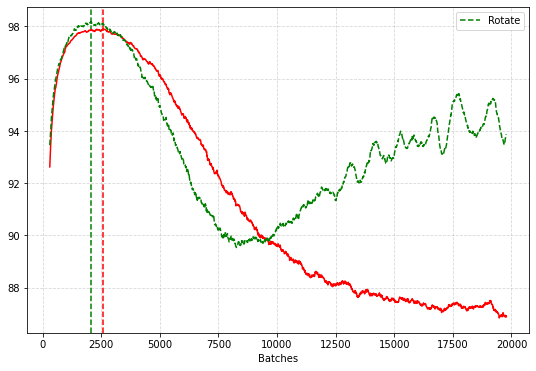

In [367]:
import torch
import numpy as np
import matplotlib.pyplot as plt

WINDOW_compare=10
START=0
END=10000
START_CUT=100
END_CUT=0
GAP=10

fig=plt.figure(figsize=(9,6))
#Adam
# NUMBER=[5000,10000,20000,25000,30000,40000]
# ITER=[6000,10000,22000,25000,36000,80000]
# END_CUT_LIST=[0,0,0,0,0,30000]
#SGD
# NUMBER=[5000,10000,20000,30000,40000]
# ITER=[5000,10000,22000,90000,120000]
# END_CUT_LIST=[0,0,0,30000,40000]

#Rate
RATE=[10,15,20,25,30,35,40,50]
END_CUT_LIST=[0,0,0,0,0,0,0,0]

DIST_MIN=[]
OPTIMAL_ACC=[]
ACC=[]

# for loop in range(len(END_CUT_LIST)):
#     Rate=RATE[loop]
#     Num=20000
#     Iter=20000
#     LabelContent=(Rate/100)
    # Rate=20
    # Num=NUMBER[loop]
    # Iter=ITER[loop]
    # END_CUT=END_CUT_LIST[loop]
    # LabelContent=Num
    # name="TrainingRecord3_Sym%d_R%d_B%d.pth" %(Num,Rate,Iter)   
    
if True:
    LabelContent="Rotate"
    name="TrainingRecord4_Rot%d_R%d_B%d.pth" %(20000,20,20000)
    
    record=torch.load(name)
    LEN=len(record[0])
    
    # gap=1000/Num
    # X=torch.linspace(gap,gap*LEN,LEN)
    # plt.xlabel("Epoches")
    
    X=record[0]
    plt.xlabel("Batches")

    WINDOW_compare=int(0.2*Num/100)
    # WINDOW_compare=50
    if WINDOW_compare%2==1 and (not WINDOW_compare==1):
        WINDOW_compare+=1

    Real=record[2]
    Compare=record[3]

    if WINDOW_compare>1:
        X_smooth=X[int(WINDOW_compare/2):-int(WINDOW_compare/2)]
        Real_smooth=np.convolve(Real,[1 for i in range(WINDOW_compare)])[WINDOW_compare-1:-WINDOW_compare]/WINDOW_compare
        Compare_smooth=np.convolve(Compare,[1 for i in range(WINDOW_compare)])[WINDOW_compare-1:-WINDOW_compare]/WINDOW_compare
    else:
        X_smooth=X
        Real_smooth=Real
        Compare_smooth=Compare

    Maximum_real=0
    for i in range(int(START/GAP),min(int(END/GAP),len(Compare_smooth))):
        if Real_smooth[i]>Maximum_real:
            Maximum_real=Real_smooth[i]
            index_real=X_smooth[i]

    dist_Maximum=0
    
    Maximum=0
    for i in range(int(START/GAP),min(int(END/GAP),len(Compare_smooth))):
        if Compare_smooth[i]>dist_Maximum:
            dist_Maximum=Compare_smooth[i]
            Maximum=Real_smooth[i]
            index=X_smooth[i]
            
    dist_Mimimum=100   
    for i in range(int(START/GAP),len(Compare_smooth)):
        if Compare_smooth[i]<dist_Mimimum:
            dist_Mimimum=Compare_smooth[i]
            
    plt.axvline(x=index_real, c="r", ls="--", label=None)
    plt.axvline(x=index, c="g", ls="--", label=None)

    plt.plot(X_smooth[int(START_CUT/GAP):-int(END_CUT/GAP)-1],Real_smooth[int(START_CUT/GAP):-int(END_CUT/GAP)-1],color='r',linestyle='-')
    plt.plot(X_smooth[int(START_CUT/GAP):-int(END_CUT/GAP)-1],Compare_smooth[int(START_CUT/GAP):-int(END_CUT/GAP)-1],color='g',linestyle='--',label=LabelContent)
    
    print("Real Optim:\t%05d, %.3f"%(index_real,Maximum_real))
    print("Dist Optim:\t%05d, %.3f"%(index,Maximum))
    print("Dist min:\t%.3f"%(100-dist_Mimimum))
    DIST_MIN.append(100-dist_Mimimum)
    OPTIMAL_ACC.append(Maximum_real)
    ACC.append(Maximum)

#添加网格线
plt.grid(True,linestyle='--',alpha=0.5)
plt.legend(loc=1)
plt.show()

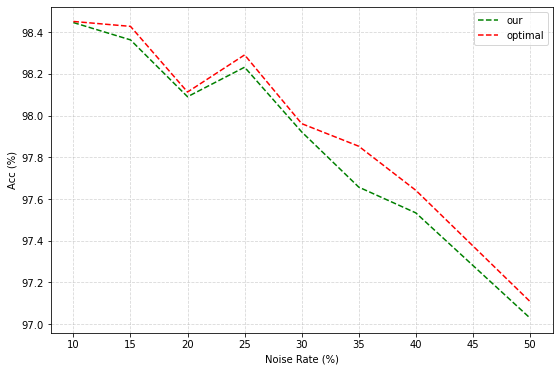

In [359]:
fig=plt.figure(figsize=(9,6))
# plt.plot(RATE,DIST_MIN,color='b',linestyle='--')
plt.plot(RATE,ACC,color='g',linestyle='--',label="our")
plt.plot(RATE,OPTIMAL_ACC,color='r',linestyle='--',label="optimal")
plt.legend(loc=1)
plt.grid(True,linestyle='--',alpha=0.5)
plt.xlabel("Noise Rate (%)")
plt.ylabel("Acc (%)")
plt.show()

9540 98.848
9960 98.799


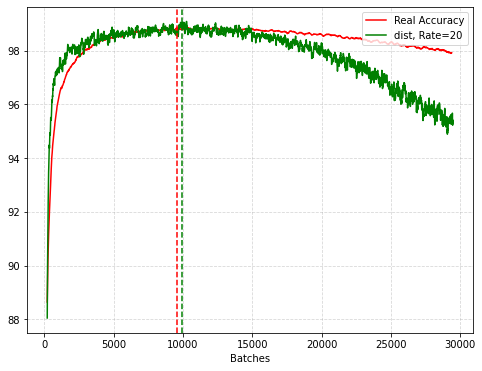

In [132]:
import torch
import numpy as np
import matplotlib.pyplot as plt

WINDOW_compare=20
START=0
END=10000
START_CUT=100
END_CUT=0
GAP=10

fig=plt.figure(figsize=(8,6))
# ax1 = fig.add_subplot(111)
# ax2 = ax1.twinx()

for loop in range(1,2):
    Rate=20
    index=1
    name="TrainingRecord_Sym_R%d_%d.pth" %(Rate,index)
    # name="TrainingRecord_Sym_R%d.pth" %(Rate)
    # name="TrainingRecord_50_400epoches.pth"
    record=torch.load(name)

    LEN=len(record[0])
    # X=torch.linspace(GAP,GAP*LEN,LEN)

    X=record[0]
    Real=record[2]
    Compare=record[4]
    # Vali=record[3]

    if WINDOW_compare>1:
        X_smooth=X[int(WINDOW_compare/2):-int(WINDOW_compare/2)]
        Real_smooth=np.convolve(Real,[1 for i in range(WINDOW_compare)])[WINDOW_compare-1:-WINDOW_compare]/WINDOW_compare
    #     Compare_smooth=np.convolve(Compare,[1 for i in range(WINDOW_compare)])[WINDOW_compare-1:-WINDOW_compare]/WINDOW_compare
    #     Vali_smooth=np.convolve(Vali,[1 for i in range(WINDOW_compare)])[WINDOW_compare-1:-WINDOW_compare]/WINDOW_compare
    else:
        X_smooth=X
        Real_smooth=Real
    Compare_smooth=Compare
    # Vali_smooth=Vali

    Maximum_real=0
    for i in range(int(START/GAP),min(int(END/GAP),len(Real_smooth))):
        if Real_smooth[i]>Maximum_real:
            Maximum_real=Real_smooth[i]
            index_real=X_smooth[i]

    Maximum=0
    for i in range(int(START/GAP),min(int(END/GAP),len(Compare_smooth))):
        if Compare_smooth[i]>Maximum:
            Maximum=Compare_smooth[i]
            index=X[i]

    # Maximum_vali=0
    # for i in range(int(START/GAP),min(int(END/GAP),len(Compare_smooth))):
    #     if Vali_smooth[i]>Maximum_vali:
    #         Maximum_vali=Vali_smooth[i]
    #         index_vali=X[i]


    plt.plot(X_smooth[int(START_CUT/GAP):-int(END_CUT/GAP)-1],Real_smooth[int(START_CUT/GAP):-int(END_CUT/GAP)-1],color='r',linestyle='-',label="Real Accuracy")
    plt.plot(X[int(START_CUT/GAP)+int(WINDOW_compare/2):-int(END_CUT/GAP)-1],Compare_smooth[int(START_CUT/GAP)+int(WINDOW_compare/2):-int(END_CUT/GAP)-1],color='g',linestyle='-',label="dist, Rate=%d"%(Rate))
    # plt.plot(X[int(START_CUT/GAP)+int(WINDOW_compare/2):-int(END_CUT/GAP)-1],Vali_smooth[int(START_CUT/GAP)+int(WINDOW_compare/2):-int(END_CUT/GAP)-1],color='y',linestyle='--',label="Accuracy on Validation Set")

    plt.axvline(x=index_real, c="r", ls="--", label=None)
    plt.axvline(x=index, c="g", ls="--", label=None)
#     plt.axvline(x=index_vali, c="y", ls="--", label=None)

    for i in range(min(int(END/GAP),len(Real_smooth))):
        if X_smooth[i]==index:
            break
    acc_best=Real_smooth[i]

    # for i in range(min(int(END/GAP),len(Real_smooth))):
    #     if X_smooth[i]==index_vali:
    #         break
    # acc_best_vali=Real_smooth[i]

    print(int(index_real),Maximum_real)
    print(int(index),acc_best)
    # print(int(index_vali.item()),acc_best_vali)
    
plt.xlabel("Batches")
#添加网格线
plt.grid(True,linestyle='--',alpha=0.5)
plt.legend(loc=1)
plt.show()

In [16]:
import torch
import numpy as np
import matplotlib.pyplot as plt

WINDOW_compare=10
START=0
END=1500
START_CUT=50
END_CUT=0
GAP=10

name="TrainingRecord_Noisy_20_0.pth"
# name="TrainingRecord_50_400epoches.pth"
record=torch.load(name)

fig=plt.figure(figsize=(8,6))
# ax1 = fig.add_subplot(111)
# ax2 = ax1.twinx()

Real0=record[0]
Real1=record[3]

LEN0=len(Real0)
X0=torch.linspace(GAP,GAP*LEN0,LEN0)
LEN1=len(Real1)
X1=torch.linspace(GAP,GAP*LEN1,LEN1)

if WINDOW_compare>1:
    X0_smooth=X0[int(WINDOW_compare/2):-int(WINDOW_compare/2)]
    Real0_smooth=np.convolve(Real0,[1 for i in range(WINDOW_compare)])[WINDOW_compare-1:-WINDOW_compare]/WINDOW_compare
    X1_smooth=X1[int(WINDOW_compare/2):-int(WINDOW_compare/2)]
    Real1_smooth=np.convolve(Real1,[1 for i in range(WINDOW_compare)])[WINDOW_compare-1:-WINDOW_compare]/WINDOW_compare

Maximum_real=0
for i in range(int(START/GAP),min(int(END/GAP),len(Compare_smooth))):
    if Real_smooth[i]>Maximum_real:
        Maximum_real=Real_smooth[i]
        index_real=X_smooth[i]
    
Maximum=0
for i in range(int(START/GAP),min(int(END/GAP),len(Compare_smooth))):
    if Compare_smooth[i]>Maximum:
        Maximum=Compare_smooth[i]
        index=X[i]
        
Maximum_vali=0
for i in range(int(START/GAP),min(int(END/GAP),len(Compare_smooth))):
    if Vali_smooth[i]>Maximum_vali:
        Maximum_vali=Vali_smooth[i]
        index_vali=X[i]


plt.plot(X0_smooth[int(START_CUT/GAP):-int(END_CUT/GAP)-1],Real0_smooth[int(START_CUT/GAP):-int(END_CUT/GAP)-1],color='r',linestyle='-',label="Real Accuracy")
plt.plot(X1_smooth[int(START_CUT/GAP):-int(END_CUT/GAP)-1],Real1_smooth[int(START_CUT/GAP):-int(END_CUT/GAP)-1],color='b',linestyle='-',label="Real Accuracy")

# plt.axvline(x=index_real, c="r", ls="--", label=None)
# plt.axvline(x=index_vali, c="y", ls="--", label=None)
# plt.axvline(x=index, c="g", ls="--", label=None)

plt.xlabel("Batches")
# plt.ylabel("dist")
#添加网格线
plt.grid(True,linestyle='--',alpha=0.5)
plt.legend(loc=1)

plt.show()

NameError: name 'Real1' is not defined

<Figure size 576x432 with 0 Axes>

380 92.124
420 91.949
450 91.36499999999998


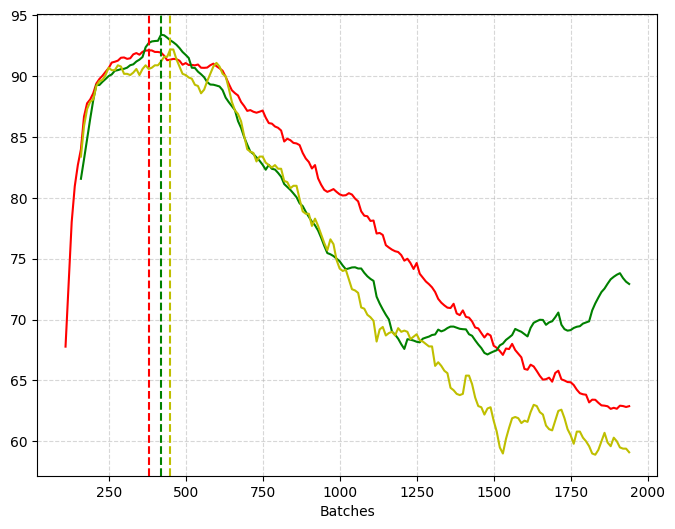

In [4]:
import torch
import numpy as np
import matplotlib.pyplot as plt

WINDOW_compare=10
START=100
END=1500
START_CUT=50
END_CUT=3000
GAP=10

name="TrainingRecord_50.pth"
# name="TrainingRecord_50_400epoches.pth"
record=torch.load(name)

fig=plt.figure(figsize=(8,6))
# ax1 = fig.add_subplot(111)
# ax2 = ax1.twinx()

LEN=len(record[0])
X=torch.linspace(GAP,GAP*LEN,LEN)

Real=record[0]
Compare=record[1]
Vali=record[2]

if WINDOW_compare>1:
    X_smooth=X[int(WINDOW_compare/2):-int(WINDOW_compare/2)]
    Real_smooth=np.convolve(Real,[1 for i in range(WINDOW_compare)])[WINDOW_compare-1:-WINDOW_compare]/WINDOW_compare
    Compare_smooth=np.convolve(Compare,[1 for i in range(WINDOW_compare)])[WINDOW_compare-1:-WINDOW_compare]/WINDOW_compare
    Vali_smooth=np.convolve(Vali,[1 for i in range(WINDOW_compare)])[WINDOW_compare-1:-WINDOW_compare]/WINDOW_compare
else:
    X_smooth=X
    Real_smooth=Real
    Compare_smooth=Compare
    Vali_smooth=Vali

Maximum_real=0
for i in range(min(int(END/GAP),len(Real_smooth))):
    if Real_smooth[i]>Maximum_real:
        Maximum_real=Real_smooth[i]
        index_real=X_smooth[i]
    
Maximum=0
for i in range(int(START/GAP),min(int(END/GAP),len(Compare_smooth))):
    if Compare_smooth[i]>Maximum:
        Maximum=Compare_smooth[i]
        index=X_smooth[i]
        
Maximum_vali=0
for i in range(int(START/GAP),min(int(END/GAP),len(Compare_smooth))):
    if Vali_smooth[i]>Maximum_vali:
        Maximum_vali=Vali_smooth[i]
        index_vali=X_smooth[i]


plt.plot(X_smooth[int(START_CUT/GAP):-int(END_CUT/GAP)-1],Real_smooth[int(START_CUT/GAP):-int(END_CUT/GAP)-1],color='r',linestyle='-')
plt.plot(X_smooth[int(START_CUT/GAP)+int(WINDOW_compare/2):-int(END_CUT/GAP)-1],Compare_smooth[int(START_CUT/GAP)+int(WINDOW_compare/2):-int(END_CUT/GAP)-1],color='g',linestyle='-')
plt.plot(X_smooth[int(START_CUT/GAP)+int(WINDOW_compare/2):-int(END_CUT/GAP)-1],Vali_smooth[int(START_CUT/GAP)+int(WINDOW_compare/2):-int(END_CUT/GAP)-1],color='y',linestyle='-')

plt.axvline(x=index_real, c="r", ls="--", label=None)
plt.axvline(x=index_vali, c="y", ls="--", label=None)
plt.axvline(x=index, c="g", ls="--", label=None)

plt.xlabel("Batches")
# plt.ylabel("dist")
#添加网格线
plt.grid(True,linestyle='--',alpha=0.5)

for i in range(min(int(END/GAP),len(Real_smooth))):
    if X_smooth[i]==index:
        break
acc_best=Real_smooth[i]

for i in range(min(int(END/GAP),len(Real_smooth))):
    if X_smooth[i]==index_vali:
        break
acc_best_vali=Real_smooth[i]

print(int(index_real.item()),Maximum_real)
print(int(index.item()),acc_best)
print(int(index_vali.item()),acc_best_vali)
plt.show()

115 90.81
150 89.37
100 88.22


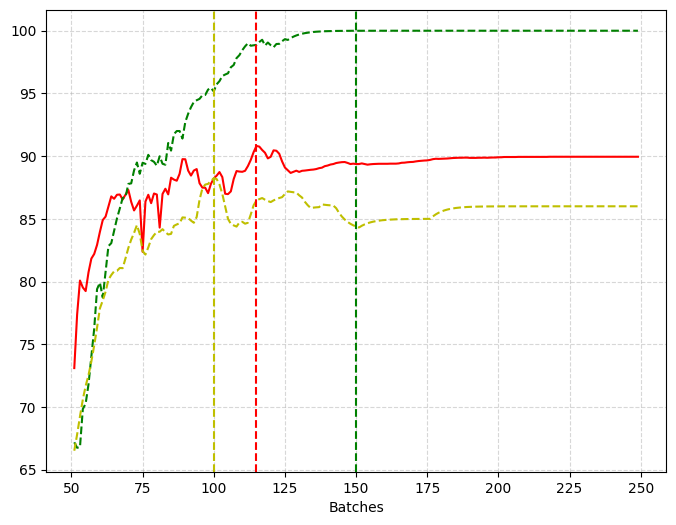

In [20]:
import torch
import numpy as np
import matplotlib.pyplot as plt

WINDOW_compare=1
START=20
END=150
START_CUT=50
END_CUT=0
GAP=1

# name = "TrainingRecord_50_small.pth"
name = "TrainingRecord_0_small.pth"

# name="TrainingRecord_50_400epoches.pth"
record=torch.load(name)

fig=plt.figure(figsize=(8,6))
# ax1 = fig.add_subplot(111)
# ax2 = ax1.twinx()

LEN=len(record[0])
X=torch.linspace(GAP,GAP*LEN,LEN)

Real=record[0]
Compare=record[3]
Vali=record[4]

if WINDOW_compare>1:
    X_smooth=X[int(WINDOW_compare/2):-int(WINDOW_compare/2)]
    Real_smooth=np.convolve(Real,[1 for i in range(WINDOW_compare)])[WINDOW_compare-1:-WINDOW_compare]/WINDOW_compare
#     Compare_smooth=np.convolve(Compare,[1 for i in range(WINDOW_compare)])[WINDOW_compare-1:-WINDOW_compare]/WINDOW_compare
#     Vali_smooth=np.convolve(Vali,[1 for i in range(WINDOW_compare)])[WINDOW_compare-1:-WINDOW_compare]/WINDOW_compare
else:
    X_smooth=X
    Real_smooth=Real
Compare_smooth=Compare
Vali_smooth=Vali

Maximum_real=0
for i in range(int(START/GAP),min(int(END/GAP),len(Compare_smooth))):
    if Real_smooth[i]>Maximum_real:
        Maximum_real=Real_smooth[i]
        index_real=X_smooth[i]
    
Maximum=0
for i in range(int(START/GAP),min(int(END/GAP),len(Compare_smooth))):
    if Compare_smooth[i]>Maximum:
        Maximum=Compare_smooth[i]
        index=X[i]
        
Maximum_vali=0
for i in range(int(START/GAP),min(int(END/GAP),len(Compare_smooth))):
    if Vali_smooth[i]>Maximum_vali:
        Maximum_vali=Vali_smooth[i]
        index_vali=X[i]


plt.plot(X_smooth[int(START_CUT/GAP):-int(END_CUT/GAP)-1],Real_smooth[int(START_CUT/GAP):-int(END_CUT/GAP)-1],color='r',linestyle='-')
plt.plot(X[int(START_CUT/GAP)+int(WINDOW_compare/2):-int(END_CUT/GAP)-1],Compare_smooth[int(START_CUT/GAP)+int(WINDOW_compare/2):-int(END_CUT/GAP)-1],color='g',linestyle='--')
plt.plot(X[int(START_CUT/GAP)+int(WINDOW_compare/2):-int(END_CUT/GAP)-1],Vali_smooth[int(START_CUT/GAP)+int(WINDOW_compare/2):-int(END_CUT/GAP)-1],color='y',linestyle='--')

plt.axvline(x=index_real, c="r", ls="--", label=None)
plt.axvline(x=index_vali, c="y", ls="--", label=None)
plt.axvline(x=index, c="g", ls="--", label=None)

plt.xlabel("Batches")
# plt.ylabel("dist")
#添加网格线
plt.grid(True,linestyle='--',alpha=0.5)

for i in range(min(int(END/GAP),len(Real_smooth))):
    if X_smooth[i]==index:
        break
acc_best=Real_smooth[i]

for i in range(min(int(END/GAP),len(Real_smooth))):
    if X_smooth[i]==index_vali:
        break
acc_best_vali=Real_smooth[i]

print(int(index_real.item()),Maximum_real)
print(int(index.item()),acc_best)
print(int(index_vali.item()),acc_best_vali)

plt.show()

98 73.249
81 71.485
82 71.042


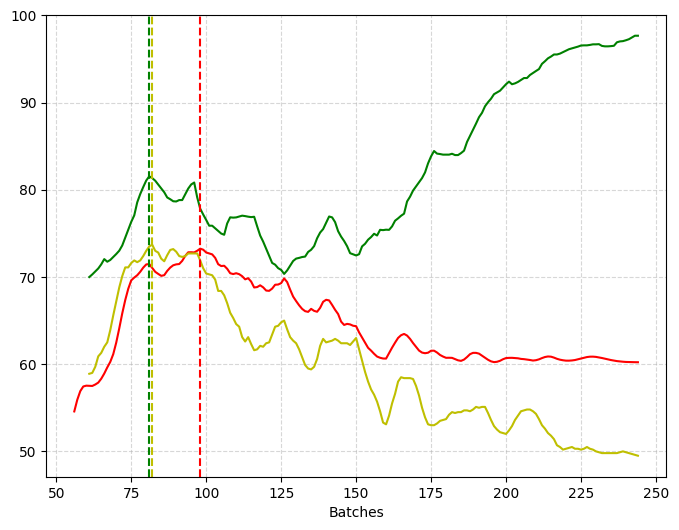

In [27]:
import torch
import numpy as np
import matplotlib.pyplot as plt

WINDOW_compare=10
START=20
END=150
START_CUT=50
END_CUT=0
GAP=1

name="TrainingRecord_50_small.pth"
# name="TrainingRecord_50_400epoches.pth"
record=torch.load(name)

fig=plt.figure(figsize=(8,6))
# ax1 = fig.add_subplot(111)
# ax2 = ax1.twinx()

LEN=len(record[0])
X=torch.linspace(GAP,GAP*LEN,LEN)

Real=record[0]
Compare=record[1]
Vali=record[2]

if WINDOW_compare>1:
    X_smooth=X[int(WINDOW_compare/2):-int(WINDOW_compare/2)]
    Real_smooth=np.convolve(Real,[1 for i in range(WINDOW_compare)])[WINDOW_compare-1:-WINDOW_compare]/WINDOW_compare
    Compare_smooth=np.convolve(Compare,[1 for i in range(WINDOW_compare)])[WINDOW_compare-1:-WINDOW_compare]/WINDOW_compare
    Vali_smooth=np.convolve(Vali,[1 for i in range(WINDOW_compare)])[WINDOW_compare-1:-WINDOW_compare]/WINDOW_compare
else:
    X_smooth=X
    Real_smooth=Real
    Compare_smooth=Compare
    Vali_smooth=Vali

Maximum_real=0
for i in range(min(int(END/GAP),len(Real_smooth))):
    if Real_smooth[i]>Maximum_real:
        Maximum_real=Real_smooth[i]
        index_real=X_smooth[i]
    
Maximum=0
for i in range(int(START/GAP),min(int(END/GAP),len(Compare_smooth))):
    if Compare_smooth[i]>Maximum:
        Maximum=Compare_smooth[i]
        index=X_smooth[i]
        
Maximum_vali=0
for i in range(int(START/GAP),min(int(END/GAP),len(Compare_smooth))):
    if Vali_smooth[i]>Maximum_vali:
        Maximum_vali=Vali_smooth[i]
        index_vali=X_smooth[i]


plt.plot(X_smooth[int(START_CUT/GAP):-int(END_CUT/GAP)-1],Real_smooth[int(START_CUT/GAP):-int(END_CUT/GAP)-1],color='r',linestyle='-')
plt.plot(X_smooth[int(START_CUT/GAP)+int(WINDOW_compare/2):-int(END_CUT/GAP)-1],Compare_smooth[int(START_CUT/GAP)+int(WINDOW_compare/2):-int(END_CUT/GAP)-1],color='g',linestyle='-')
plt.plot(X_smooth[int(START_CUT/GAP)+int(WINDOW_compare/2):-int(END_CUT/GAP)-1],Vali_smooth[int(START_CUT/GAP)+int(WINDOW_compare/2):-int(END_CUT/GAP)-1],color='y',linestyle='-')

plt.axvline(x=index_real, c="r", ls="--", label=None)
plt.axvline(x=index_vali, c="y", ls="--", label=None)
plt.axvline(x=index, c="g", ls="--", label=None)

plt.xlabel("Batches")
# plt.ylabel("dist")
#添加网格线
plt.grid(True,linestyle='--',alpha=0.5)

for i in range(min(int(END/GAP),len(Real_smooth))):
    if X_smooth[i]==index:
        break
acc_best=Real_smooth[i]

for i in range(min(int(END/GAP),len(Real_smooth))):
    if X_smooth[i]==index_vali:
        break
acc_best_vali=Real_smooth[i]

print(int(index_real.item()),Maximum_real)
print(int(index.item()),acc_best)
print(int(index_vali.item()),acc_best_vali)
plt.show()